In [0]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq 

In [2]:
!pip install konlpy

In [0]:
import nltk
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [0]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [5]:
import numpy as np
import matplotlib as mpl
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf' # 설치된 나눔글꼴중 원하는 녀석의 전체
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
## 음수 표시되도록 설정
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [6]:
text = open("sherlock.txt").read()
text

'\ufeffTo Sherlock Holmes she is always the woman. I have seldom heard him mention her under any other name. In his eyes she eclipses and predominates the whole of her sex. It was not that he felt any emotion akin to love for Irene Adler. All emotions, and that one particularly, were abhorrent to his cold, precise but admirably balanced mind. He was, I take it, the most perfect reasoning and observing machine that the world has seen, but as a lover he would have placed himself in a false position. He never spoke of the softer passions, save with a gibe and a sneer. They were admirable things for the observer—excellent for drawing the veil from men’s motives and actions. But for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results. Grit in a sensitive instrument, or a crack in one of his own high-power lenses, would not be more disturbing than a stro

In [0]:
mask = np.array(Image.open("sherlock.png"))

In [9]:
wc = WordCloud(background_color='white', #백그라운드 컬러
               max_words=2000,  #최대단어수
               mask=mask, #어떤 이미지와 함께 표시할건가
               contour_width=3, #외곽선
               contour_color="steelblue" # 외곽선 색
            )
               

wc.generate(text) #단어와 빈도수를 보는것 
wc.words_ #그것을 보게해줌 1인단어는 제일많이 나온 단어이다

{'Absolutely': 0.13333333333333333,
 'Atkinson': 0.06666666666666667,
 'Avenue': 0.06666666666666667,
 'Baker': 0.13333333333333333,
 'Beyond': 0.06666666666666667,
 'Bohemia': 0.26666666666666666,
 'Bohemian': 0.2,
 'Born': 0.06666666666666667,
 'Boswell': 0.06666666666666667,
 'Briony': 0.06666666666666667,
 'Carlsbad': 0.06666666666666667,
 'Cassel': 0.06666666666666667,
 'Clotilde': 0.06666666666666667,
 'Co': 0.06666666666666667,
 'Company': 0.06666666666666667,
 'Continental': 0.06666666666666667,
 'Contralto': 0.06666666666666667,
 'Count': 0.2,
 'Doctor': 0.2,
 'Dr': 0.06666666666666667,
 'Duke': 0.06666666666666667,
 'Eg': 0.06666666666666667,
 'Eglonitz': 0.06666666666666667,
 'Eglow': 0.06666666666666667,
 'Egria': 0.06666666666666667,
 'England': 0.06666666666666667,
 'English': 0.06666666666666667,
 'Europe': 0.2,
 'European': 0.06666666666666667,
 'Felstein': 0.06666666666666667,
 'Forgery': 0.06666666666666667,
 'Frenchman': 0.06666666666666667,
 'Gazetteer': 0.066666666

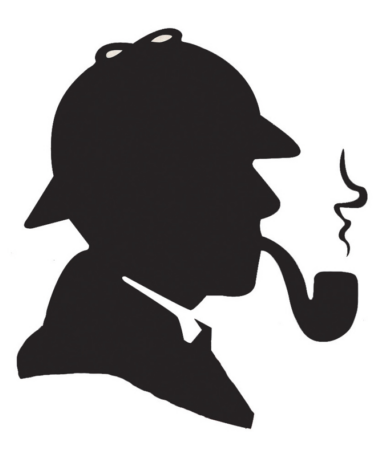

In [10]:
plt.figure(figsize=(15,8))
plt.imshow(mask,cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

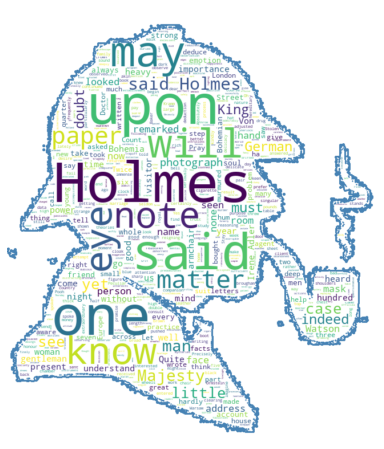

In [11]:
plt.figure(figsize=(15,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
doc_ko = open('sherlockor.txt').read()

In [13]:
from konlpy.tag import Okt ### Okt
t = Okt()
doc_nouns = t.nouns(doc_ko)
doc_nouns
ko = nltk.Text(doc_nouns, name="셜록")
print(type(ko))
print(len(ko.tokens))

<class 'nltk.text.Text'>
3847


In [14]:
most_fre = ko.vocab().most_common(50)
most_fre

[('홈즈', 88),
 ('그', 88),
 ('편지', 85),
 ('것', 79),
 ('부인', 66),
 ('씨', 50),
 ('말', 50),
 ('이', 44),
 ('루카스', 44),
 ('저', 37),
 ('알', 36),
 ('남편', 34),
 ('생각', 33),
 ('호프', 31),
 ('장관', 30),
 ('수', 30),
 ('사건', 30),
 ('건', 29),
 ('여자', 29),
 ('제', 28),
 ('사람', 24),
 ('우리', 23),
 ('때문', 23),
 ('당신', 23),
 ('양탄자', 23),
 ('총리', 22),
 ('손', 21),
 ('지금', 19),
 ('걸', 19),
 ('얼굴', 18),
 ('거', 18),
 ('요', 18),
 ('함', 17),
 ('방', 17),
 ('두', 16),
 ('가지', 16),
 ('비밀', 15),
 ('저녁', 15),
 ('어제', 15),
 ('일', 15),
 ('내', 15),
 ('하나', 15),
 ('또', 14),
 ('곳', 14),
 ('무슨', 14),
 ('핏자국', 14),
 ('경감', 14),
 ('집', 13),
 ('전', 13),
 ('나', 13)]

In [0]:
from PIL import Image
data2 = ko.vocab().most_common(1000)

In [0]:
wc = WordCloud(background_color='white',
    max_words=1000,
    mask=mask,
    contour_width=3,
    contour_color="steelblue",
 font_path=path).generate_from_frequencies(dict(data2))

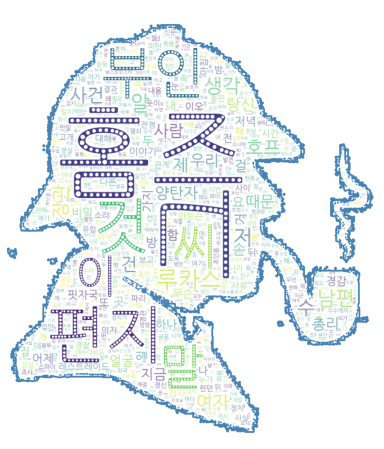

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [0]:
stop_words = ['홈즈','그','편지','것','부인','씨','말','이','루카스','저','알','남편','생각','호프','장관','수','사건','건']
new_ko = [ ]
for one_word in ko:
  if one_word not in stop_words:
    new_ko.append(one_word)

In [0]:
new_ko = nltk.Text(new_ko, name="셜록")

In [0]:
data = new_ko.vocab().most_common(1000)

In [0]:
wc = WordCloud(background_color='white',
      max_words=1000,
      mask=mask,
      contour_width=3,
      contour_color="steelblue",
 font_path=path).generate_from_frequencies(dict(data))

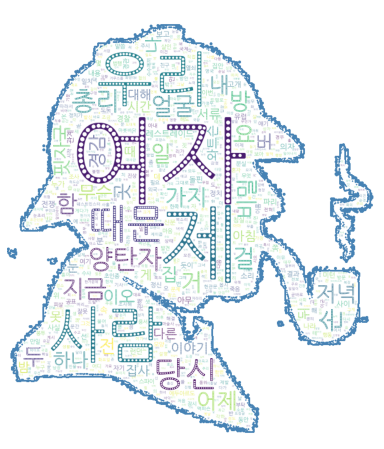

In [24]:
plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()